In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns;
import scipy as sc
from scipy.stats import linregress
from scipy.optimize import curve_fit

# problem 1

#### (a) By hand, compute the value of the first derivative of 𝑓(𝑥) = 𝑒^(−2𝑥) − 𝑥 at 𝑥 = 2

f'(x) = d/dx(e^(-2x)) - d/dx(x) = -2e^(-2x) - 1 

f'(2) = -2e^(-2*2) - 1 = approx -1.03663

#### (b) Evaluate the first- and second-order centered finite-difference approximation for the first derivative of 𝑓(𝑥). Start with ∆𝑥 = 0.5, i.e., using 𝑥 = 2 ± 0.5 for the firstorder approximation and 𝑥 = 2 ± (2 ∗ 0.5) for the second-order approximation. Repeat this calculation for a range of ∆𝑥 down to 0.01. Plot the approximations as a function of ∆𝑥. Include a horizontal line at the true value you computed in part (a).

-1.0430491213687785
-1.036633719911484
-1.035256073315047
-1.0366312775820805


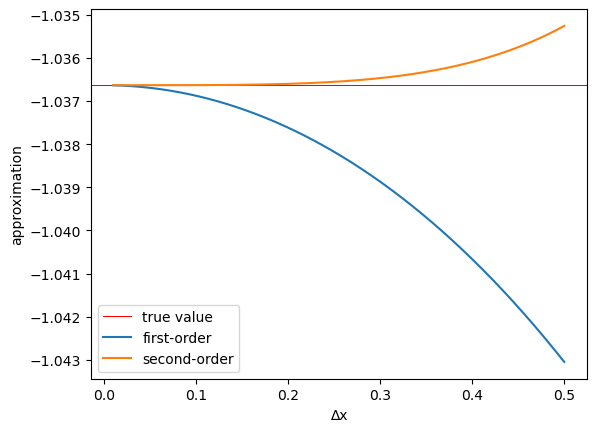

In [164]:
def f(x):
    return np.e ** (-2*x) - x

def fprime(x,delta):
    res = ((f(x+delta) - f(x-delta)) / (2*delta))
    return res


def f2prime(x,delta):
    res = ((-f(x+(2*delta)) + 8*f(x+delta) - 8*f(x-delta) \
            + f(x-(2*delta))) / (delta*12))
    return res

print(fprime(2,.5))
print(fprime(2,.01))
print(f2prime(2,.5))
print(f2prime(2,.01))
true = ((-2*np.exp(-2*2))-1)

xvals = np.linspace(.01, .5, 1000)

plt.axhline(true,color='red',label='true value',linewidth=.75)
plt.plot(xvals,fprime(2,xvals),label='first-order')
plt.plot(xvals,f2prime(2,xvals),label='second-order')
plt.xlabel('∆x')
plt.ylabel('approximation')
plt.legend(loc='lower left')
plt.show()

#### (c) Repeat (b) for the forward-difference and backward-difference (remember now to use up to 𝑥 = 2 ± 2∆𝑥 for the two methods). Plot the three first-order methods together and the three second-order methods together side by side and compare. Plot the first-order centered difference against the second-order forward and backward difference approximations. How do they compare? Include legends in your plots. In what qualitative ways do the three methods differ?

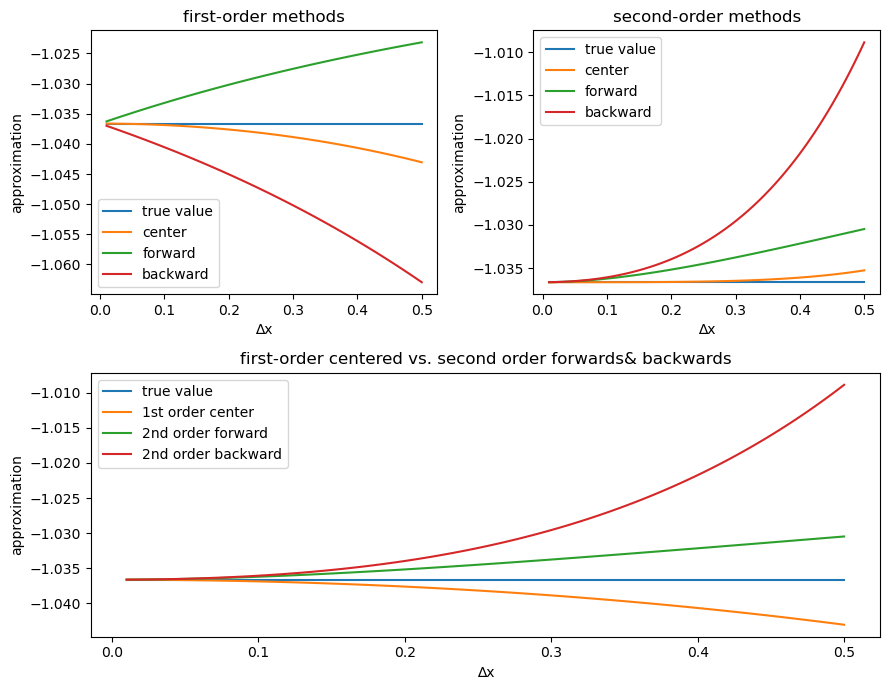

In [165]:
def fprime(x,delta,diff):
    if diff == 'center':
        res = ((f(x+delta) - f(x-delta)) / (2*delta))
    elif diff == 'forward':
        res = (f(x+delta)-f(x)) / (delta)
    elif diff == 'backward':
        res = (f(x)-f(x-delta)) / (delta)
    else:
        print('please choose the type of finite-divided\
        difference approximation (center, forward, or backward)')
    return res

def f2prime(x,delta,diff):
    if diff == 'center':
        res = ((-f(x+(2*delta)) + 8*f(x+delta) - 8*f(x-delta) \
                + f(x-(2*delta))) / (delta*12))
    elif diff == 'forward':
        res = ((-f(x+(2*delta)) + 4*f(x+delta) - 3*f(x)) / (delta*2))
    elif diff == 'backward':
        res = ((3*f(x) - 4*f(x-delta) + f(x-(2*delta))) / (delta*2))
    else:
        print('please choose the type of finite-divided\
        difference approximation (center, forward, or backward)')
    return res

xvals = np.linspace(.01, .5, 100)
truev=[true]*100
fig = plt.figure(figsize=[9,7])

gs = fig.add_gridspec(2,2)
one = fig.add_subplot(gs[0, 0])
two = fig.add_subplot(gs[0, 1])
three = fig.add_subplot(gs[1, :])
fig.tight_layout()

one.plot(xvals,truev,label='true value')
one.plot(xvals,fprime(2,xvals,'center'),label='center')
one.plot(xvals,fprime(2,xvals,'forward'),label='forward')
one.plot(xvals,fprime(2,xvals,'backward'),label='backward')
one.legend()
one.set_xlabel('∆x')
one.set_ylabel('approximation')
one.set_title('first-order methods')

two.plot(xvals,truev,label='true value')
two.plot(xvals,f2prime(2,xvals,'center'),label='center')
two.plot(xvals,f2prime(2,xvals,'forward'),label='forward')
two.plot(xvals,f2prime(2,xvals,'backward'),label='backward')
two.legend()
two.set_xlabel('∆x')
two.set_ylabel('approximation')
two.set_title('second-order methods')

three.plot(xvals,truev,label='true value')
three.plot(xvals,fprime(2,xvals,'center'),label='1st order center')
three.plot(xvals,f2prime(2,xvals,'forward'),label='2nd order forward')
three.plot(xvals,f2prime(2,xvals,'backward'),label='2nd order backward')
three.legend()
three.set_xlabel('∆x')
three.set_ylabel('approximation')
three.set_title('first-order centered vs. second order forwards\
& backwards')
plt.tight_layout()


the first order centered is much more accurate than other first order methods, and it can even hold up against the other second order methods. 

one qualitative difference is that the first order center approximations are lower than the true value while the second order approximations are above.

#### (d) Plot the relative and absolute errors side-by-side in a figure. Again, include a legend. What information does this give you? What is the order of the error in forward difference approximation, in terms of ∆𝑥? What is the order in backward and centered approximations? 

the absolute and relative errors seem to be mirrored over x=0 to get the other error (ae -> re or re -> ae). the order of error in forward difference approximations of order n is h^n, this is the same for backwards difference approximations. the order of centered approximations of order n is h^(2n).


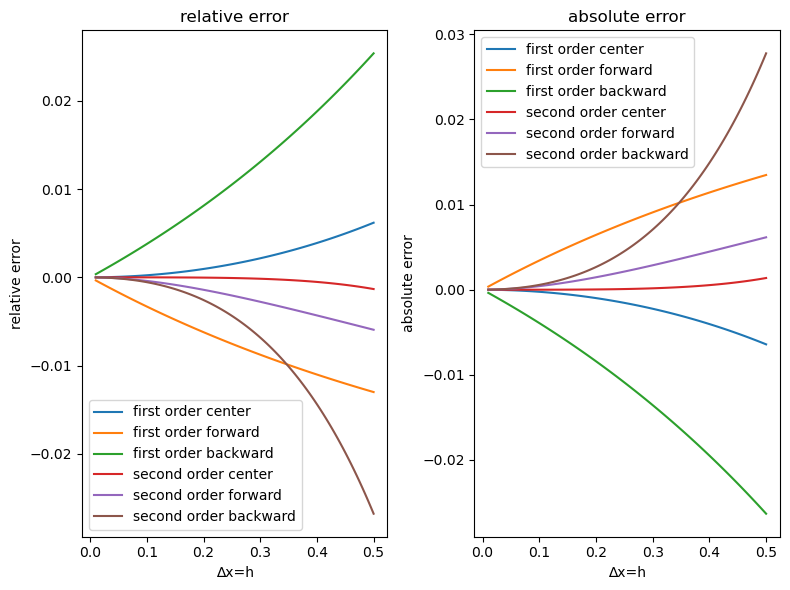

In [224]:
fig = plt.figure(figsize=[8,6])
gs = fig.add_gridspec(1,2)
re = fig.add_subplot(gs[0, 0])
ae = fig.add_subplot(gs[0, 1])
fig.tight_layout()

c1r=[]
f1r=[]
b1r=[]
c2r=[]
f2r=[]
b2r=[]
c1a=[]
f1a=[]
b1a=[]
c2a=[]
f2a=[]
b2a=[]


for i in range(len(xvals)):
    c1r.append((fprime(2,xvals,"center")[i]-true)/true)
    f1r.append((fprime(2,xvals,"forward")[i]-true)/true)
    b1r.append((fprime(2,xvals,"backward")[i]-true)/true)
    c2r.append((f2prime(2,xvals,"center")[i]-true)/true)
    f2r.append((f2prime(2,xvals,"forward")[i]-true)/true)
    b2r.append((f2prime(2,xvals,"backward")[i]-true)/true)
    c1a.append((fprime(2,xvals,"center")[i]-true))
    f1a.append((fprime(2,xvals,"forward")[i]-true))
    b1a.append((fprime(2,xvals,"backward")[i]-true))
    c2a.append((f2prime(2,xvals,"center")[i]-true))
    f2a.append((f2prime(2,xvals,"forward")[i]-true))
    b2a.append((f2prime(2,xvals,"backward")[i]-true))
    
re.plot(xvals,c1r,label='first order center')
re.plot(xvals,f1r,label='first order forward')
re.plot(xvals,b1r,label='first order backward')
re.plot(xvals,c2r,label='second order center')
re.plot(xvals,f2r,label='second order forward')
re.plot(xvals,b2r,label='second order backward')
re.set_title('relative error')
re.set_xlabel('∆x=h')
re.set_ylabel('relative error')
re.legend()

ae.plot(xvals,c1a,label='first order center')
ae.plot(xvals,f1a,label='first order forward')
ae.plot(xvals,b1a,label='first order backward')
ae.plot(xvals,c2a,label='second order center')
ae.plot(xvals,f2a,label='second order forward')
ae.plot(xvals,b2a,label='second order backward')
ae.set_title('absolute error')
ae.set_xlabel('∆x=h')
ae.set_ylabel('absolute error')
ae.legend()

plt.tight_layout()

print(f'the absolute and relative errors seem to be mirrored over x=0\
 to get the other error (ae -> re or re -> ae). the order of error in\
 forward difference approximations of order n is h^n, this is the same\
 for backwards\
 difference approximations. the order of centered approximations of\
 order n is h^(2n).')

# problem 2

Estimate (a) velocity (𝑑𝑥/𝑑𝑡) and (b)
acceleration (𝑑𝑣/𝑑𝑡) using first-order and second-order forward difference numerical
differentiation. Plot the position, the velocity, and the acceleration of the jet fighter versus
time side-by-side in a figure.

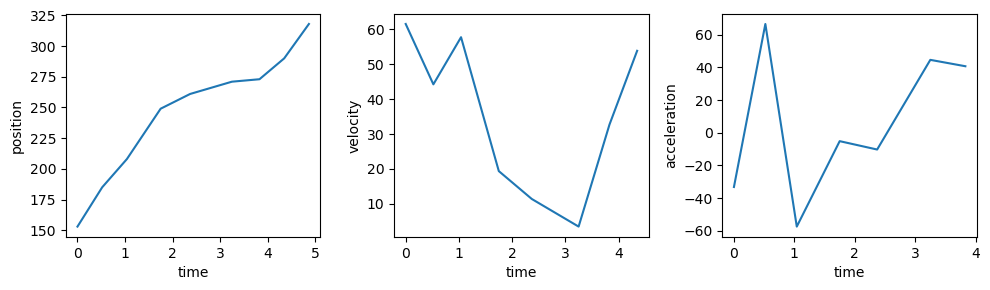

In [6]:
time = [0, 0.52, 1.04, 1.75, 2.37, 3.25, 3.83, 4.35, 4.87]
x = [153, 185, 208, 249, 261, 271, 273, 290, 318]
velocities=[]
acc=[]

for i in range(len(x)-1):
    velocities.append((x[i+1]-x[i]) / (time[i+1]-time[i]))
for i in range(len(x)-2):
    acc.append((x[i+2] - 2*x[i+1] + x[i]) / ((time[i+1]-time[i])**2))

fig = plt.figure(figsize=[10,3])
gs = fig.add_gridspec(1,3)
pos = fig.add_subplot(gs[0, 0])
v = fig.add_subplot(gs[0, 1])
a = fig.add_subplot(gs[0, 2])
fig.tight_layout()

pos.plot(time,x)
pos.set_xlabel('time')
pos.set_ylabel('position')

v.plot(time[0:-1],velocities)
v.set_xlabel('time')
v.set_ylabel('velocity')

a.plot(time[0:-2],acc)
a.set_xlabel('time')
a.set_ylabel('acceleration')

plt.tight_layout()

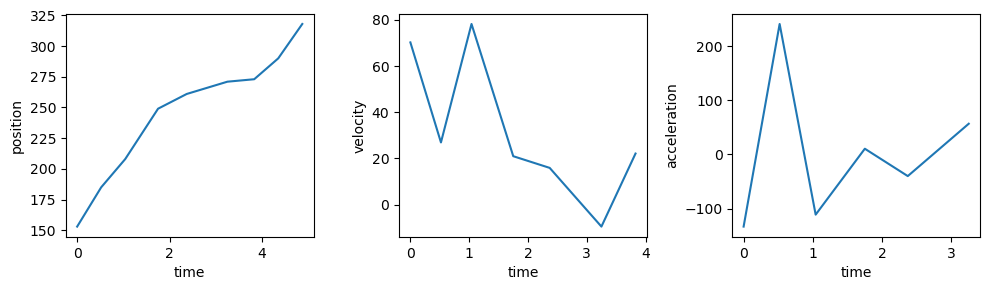

In [7]:
vel2=[]
acc2=[]
for i in range(len(x)-2):
    vel2.append((-x[i+2] + 4*x[i+1] - 3*x[i]) / ((time[i+1]-time[i])*2))
for i in range(len(x)-3):
    acc2.append((-x[i+3] + 4*x[i+2] - 5*x[i+1] + 2*x[i])\
                / ((time[i+1]-time[i])**2))
    
fig = plt.figure(figsize=[10,3])
gs = fig.add_gridspec(1,3)
pos = fig.add_subplot(gs[0, 0])
v = fig.add_subplot(gs[0, 1])
a = fig.add_subplot(gs[0, 2])
fig.tight_layout()

pos.plot(time,x)
pos.set_xlabel('time')
pos.set_ylabel('position')

v.plot(time[0:-2],vel2)
v.set_xlabel('time')
v.set_ylabel('velocity')

a.plot(time[0:-3],acc2)
a.set_xlabel('time')
a.set_ylabel('acceleration')

plt.tight_layout()

# problem 3

Focused Ion Beams (FIB) are common tools for making nano-photonic devices. A very tired
graduate student forgets to calibrate the FIB before patterning her device and discovers that
the ions have been implanted, thus creating an undesired residual electric field. She can
measure the field, and uses this data to develop a model:
𝑬⃑ (𝒙, 𝒚) = 𝑬𝒙𝒙⃑ + 𝑬𝒚𝒚⃑ = (𝒙^𝟑 − 𝟒𝒙^𝟐 + 𝟐𝒙^𝟐*𝒚)𝒙⃑ + (𝟐𝒚^𝟑 + 𝟐𝒚^𝟐 + 𝟏. 𝟓𝒚)𝒚⃑
in units of 𝒏𝑽/𝝁𝒎. This (now extremely tired) graduate student is interested in calculating the
distribution of ions in her device, so that she can correctly calibrate the FIB in the future. Luckily
the material is isotropic and linear, so that she can write the free charge using Gauss’s Law.

#### (a) First, generate a contour plot of the electric field magnitude and the electric vector field side by side over the domain [(−5, −5), (5, 5)]. Do not forget to include a color bar, as well as correct units for all three axes. Are these electric fields large, relative to human scale (Hint: plug order of magnitude numbers into Wolfram Alpha for some fun comparisons)?

these fields are small compared to human scale, it is 3 ordersof magnitude smaller


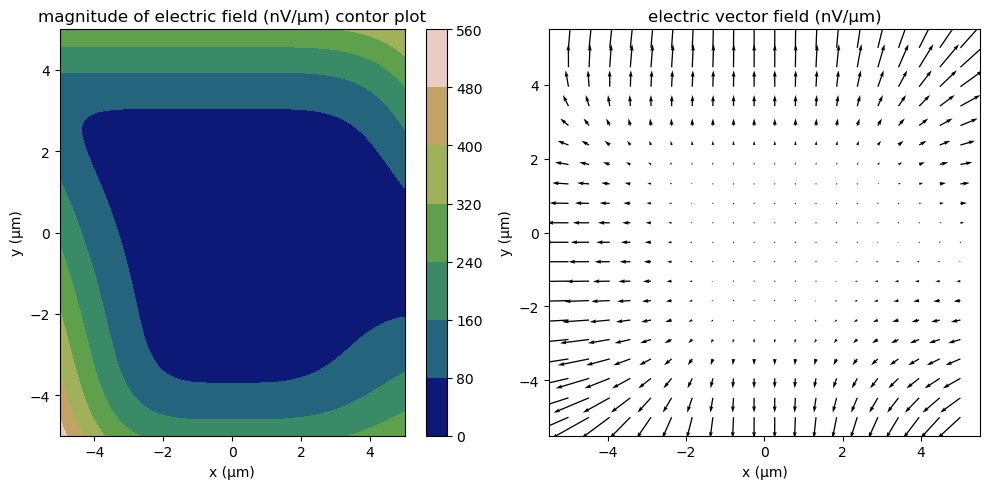

In [465]:
def e(y, x):
    u = (x**3) - 4*(x**2) + 2*(x**2)*y
    v = 2*(y**3) + 2*(y**2) + 1.5*y
    return ((u**2)+(v**2))**(1/2), u, v

xcont = np.linspace(-5, 5, 100)
ycont = np.linspace(-5, 5, 100)
xvec = np.linspace(-5, 5, 20)
yvec = np.linspace(-5, 5, 20)

magnitudes=[]
u=[]
v=[]
for i in range(len(xcont)):
    magnitudes.append([0]*100)
    for j in range(len(ycont)):
        magnitudes[i][j]=(e(xcont[i],ycont[j])[0])
for i in range(len(xvec)):
    u.append([0]*20)
    v.append([0]*20)
    for j in range(len(yvec)):
        u[i][j]=(e(xvec[i],yvec[j])[1])
        v[i][j]=(e(xvec[i],yvec[j])[2])

fig = plt.figure(figsize=[10,5])
gs = fig.add_gridspec(1,2)
cont = fig.add_subplot(gs[0, 0])
vec = fig.add_subplot(gs[0, 1])
fig.tight_layout()

cp=cont.contourf(xcont,ycont,magnitudes,cmap=plt.get_cmap('gist_earth'))
fig.colorbar(cp, ax=cont)
cont.set_title('magnitude of electric field (nV/μm) contor plot')
cont.set_xlabel('x (μm)')
cont.set_ylabel('y (μm)')

vf=vec.quiver(xvec,yvec,u,v)
vec.set_title('electric vector field (nV/μm)')
vec.set_xlabel('x (μm)')
vec.set_ylabel('y (μm)')

plt.tight_layout()

print(f'these fields are small compared to human scale, it is 3 orders\
of magnitude smaller')

#### (b) Using second-order centered finite difference and an appropriate ∆𝑥, calculate the free charge density (𝜌𝑓𝑟𝑒𝑒), assuming the relative permittivity (𝜀) of this material is approximately 3.9 (a gold star for those who can correctly guess the material).

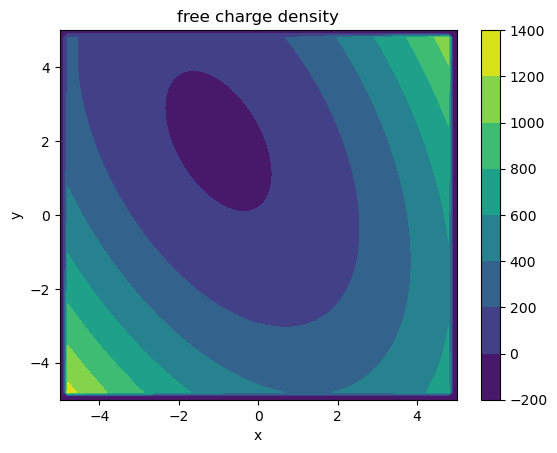

In [527]:
def e(x, y):
    u = (x**3) - 4*(x**2) + 2*(x**2)*y
    v = 2*(y**3) + 2*(y**2) + 1.5*y
    return ((u**2)+(v**2))**(1/2), u, v
x=xcont
y=ycont
delta = 0.1
eps = 3.9
fcd = []
for i in range(len(xcont)):
    fcd.append([0]*100)
sub=[0,0]

for i in range(2,len(xcont)-2):
    for j in range(2,len(ycont)-2):
        xd = (-e(x[i+2],y[j])[1] + 8*e(x[i+1],y[j])[1] \
              - 8*e(x[i-1],y[j])[1] + e(x[i-2],y[j])[1]) / (12*delta)
        yd = (-e(x[i], y[j + 2])[2] + 8 * e(x[i],y[j+1])[2] \
              - 8*e(x[i],y[j-1])[2] + e(x[i],y[j-2])[2]) / (12*delta)
        sub.append((xd + yd) * eps)
    fcd[i]=(sub)
    fcd[i].append(0)
    fcd[i].append(0)
    sub=[0,0]
    
fig = plt.figure()
gs = fig.add_gridspec(1,1)
density = fig.add_subplot(gs[0, 0])

cp = density.contourf(xcont, ycont, fcd)
fig.colorbar(cp)
density.set_title('free charge density')
density.set_xlabel('x')
density.set_ylabel('y')
plt.show()

# problem 4
The Very Tired Graduate Student brought a loaf of bread to the ERC so that they could prepare
a sandwich for lunch each day of the week. They left the bread in the lab refrigerator but did
not realize that the refrigerator was broken. Unfortunately, the bread began to spoil over time.
A group of undergrads observed this, and rather than notifying The Very Tired Graduate
Student, they decided to characterize the growth of microorganisms in the bread over time.
The data that each student collected is provided below. It is organized by undergrad student
number, with each undergrad reporting the time (in hours) and measured bacteria count per
slice of bread (in thousands). For example, Undergrad 1 counted 1.7 thousand bacteria at 1.2
hours.

#### (a) Create a publication-quality scatterplot of the data for bacteria count versus time. Each undergrad’s data should be presented using a different color. 

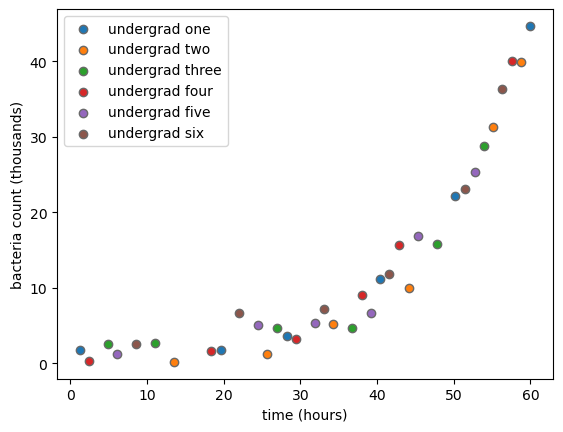

In [8]:
one={'time':[1.2,19.6,28.2,40.4,50.2,60.0],'bacteria':[1.7,1.7,3.6,11.2,22.2,44.7]}
two={'time':[13.5,25.7,34.2,44.1,55.1,58.8],'bacteria':[0.16,1.2,5.2,9.9,31.3,39.9]}
three={'time':[4.9,11,26.9,36.7,47.8,53.9],'bacteria':[2.5,2.7,4.7,4.7,15.8,28.8]}
four={'time':[2.4,18.4,29.4,38,42.9,57.6],'bacteria':[0.3,1.6,3.2,9,15.7,40]}
five={'time':[6.1,24.5,31.9,39.2,45.3,52.7],'bacteria':[1.2,5.1,5.3,6.7,16.8,25.4]}
six={'time':[8.6,22,33.1,41.6,51.4,56.3],'bacteria':[2.5,6.7,7.2,11.8,23.1,36.3]}
d={'one':one,'two':two,'three':three,'four':four,'five':five,'six':six}

for i in d:
    plt.scatter(d[i]['time'],d[i]['bacteria'],label=f'undergrad {i}',edgecolors= "dimgrey")

plt.legend()
plt.xlabel('time (hours)')
plt.ylabel('bacteria count (thousands)')
plt.show()

#### (b) The undergraduates anticipate that the bacteria count can be modeled using an exponential function. For only the data from Undergrad 1, find the parameters of the exponential model using a linear regression. 

In [9]:
logs=[]
for i in d['one']['bacteria']:
    logs.append(np.log(i))
model = linregress(d['one']['time'],logs)
alpha=np.exp(model.intercept)
beta=(model.slope)

print(f'c = {round(alpha,4)} * exp({round(beta,4)} * t)')
print(d['one']['time'][0])

c = 0.9083 * exp(0.0613 * t)
1.2


#### (c) Compare the linearly regressed model expression to the results from scipy's curve_fit function. Plot the original data along with the fitting of both exponential models (i.e., from the linearized regression and curve_fit) for Undergrad 1

c = 0.553 * exp(0.0732*t) + 0.1011


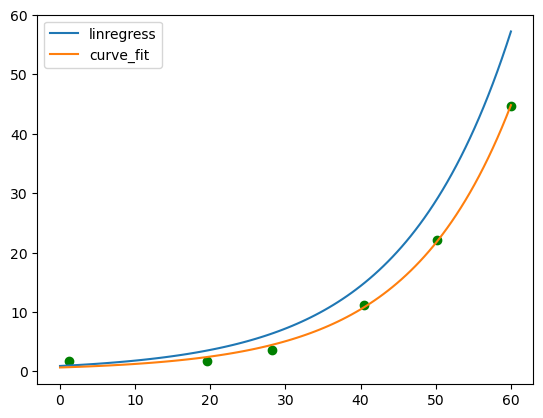

In [155]:
def cf(x, alpha, beta, c):
    return alpha*np.exp(beta*x) + c
p0=[.1,.1,.1]

param, _ = curve_fit(cf,d['one']['time'],d['one']['bacteria'],p0)
print(f'c = {round(param[0], 4)} * exp({round(param[1], 4)}*t)\
 + {round(param[2], 4)}')

regmodel=[]
cfmodel=[]
times=np.linspace(0,60,100)
for i in times:
    regmodel.append(alpha * np.exp(i*beta))
    cfmodel.append(param[0]*np.exp(i*param[1]) + param[2])

plt.scatter(d['one']['time'],d['one']['bacteria'],c='g')
plt.plot(times,regmodel,label='linregress')
plt.plot(times,cfmodel,label='curve_fit')
plt.legend()
plt.show()

#### (d) Which of the two approaches yields a better fit? Explain how these two approaches fit the empirical data to the exponential model (i.e., what is the numeric computation being performed) and why different outcomes result. 

The curve_fit function yields a much better fit, this is because curve_fit is much more complex and uses non-linear least squares regression. 

Linear Regression attempts to minimized the mean squared error with a linear relationship (slope of beta and intercept of alpha from the linregress), and those determine the fit line in an exponential (alpha * exp(beta*t)). 

Curve_fit focuses on finding the best fit to data points non-linearly. There is an alpha and beta that are refined by inital parameters into an exponential fit, but there is also an intercept for the exponantial function using a third parameter. Each parameter is refined from an inital guess using first order Taylor series expansions. This allows for a better fit than linear regression.

#### (e) As more data points are collected, it might be expected that the difference between the best fit model expressions from the linear regression and curve_fit become smaller. The undergrads decide to test this out. For the curve_fit regression, plot the standard error of the estimate versus n, where the fitting is performed for the datasets provided by the first n undergraduates (e.g., when n=3, use the data from Undergrads 1, 2, and 3). The standard error of the estimate is given as S𝑦/𝑥 = √((𝑆𝑅)/(𝑚−2)) where 𝑆𝑅 is the sum of squared residuals and 𝑚 is the number of data points that have been regressed. Briefly explain your observations. Assuming the best quality fit is achieved using the curve_fit algorithm applied to the data from all the undergrads, plot the absolute error in the exponential rate constant computed from the linearized regression as a function of n. 

as m increases with more data points, the standarderror seems to grow logarithmically


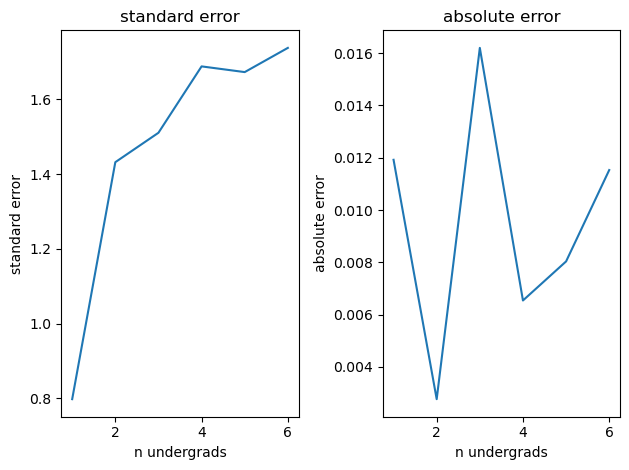

In [113]:
t=[]
bac=[]
standerr=[]
abserr=[]
n=0
x=[]
for i in d:
    n+=1
    x.append(n)
    p0=[.5,.5,1]
    sumsr=0
    t.extend(d[i]['time'])
    bac.extend(d[i]['bacteria'])
    p, _ = curve_fit(cf, t, bac, p0)
    lns=[]
    for k in bac:
        lns.append(np.log(k))
    regmodel = linregress(t, lns)
    beta = regmodel.slope
    for j in range(len(bac)):
        r=bac[j]-cf(t[j],p[0],p[1],p[2])
        sumsr+=r**2
    standerr.append(math.sqrt(sumsr/(6*n-2)))
    abserr.append(abs(beta-p[1]))

print('as m increases with more data points, the standard\
error seems to grow logarithmically')


fig = plt.figure()
gs = fig.add_gridspec(1,2)
se = fig.add_subplot(gs[0, 0])
ae = fig.add_subplot(gs[0, 1])
fig.tight_layout()

se.plot(x,standerr)
se.set_title('standard error')
se.set_ylabel('standard error')
se.set_xlabel('n undergrads')

ae.plot(x,abserr)
ae.set_title('absolute error')
ae.set_ylabel('absolute error')
ae.set_xlabel('n undergrads')

plt.tight_layout()

#### (f) Using the fitting parameters from the curve_fit algorithm applied to the data from all the undergrads, provide the exponential model equation.

In [125]:
print(f'c = {round(p[0],4)} * exp({round(p[1],4)}*t) + {round(p[2],4)}')

c = 0.3587 * exp(0.0806*t) + 0.7871


#### (g) The Very Tired Graduate Student accidentally ate a slice of the bread at the 40-hour mark. What was the bacteria count at that time?

In [126]:
print(f'the bacteria count when the bread was eaten (40 hours) \
was {round(cf(40,p[0],p[1],p[2]) * 1000, 4)}')

the bacteria count when the bread was eaten (40 hours) was 9794.0203


# problem 5

The rate of cooling of a body can be expressed as 𝑑𝑇/𝑑𝑡 = −𝑘(𝑇 − 𝑇𝑎)
where 𝑇 = temperature of the body (°C), 𝑇𝑎 = temperature of the surrounding medium (°C), and
𝑘 = a proportionality constant (per minute). Thus, this equation (called Newton’s law of
cooling) specifies that the rate of cooling is proportional to the difference in the temperatures
of the body and of the surrounding medium. If a metal ball heated to 80°C is dropped into
water that is held constant at 𝑇𝑎 = 20 °C, the temperature of the ball changes, as in the table.

#### (a) Plot 𝑑𝑇/𝑑𝑡 versus 𝑇 − 𝑇𝑎.

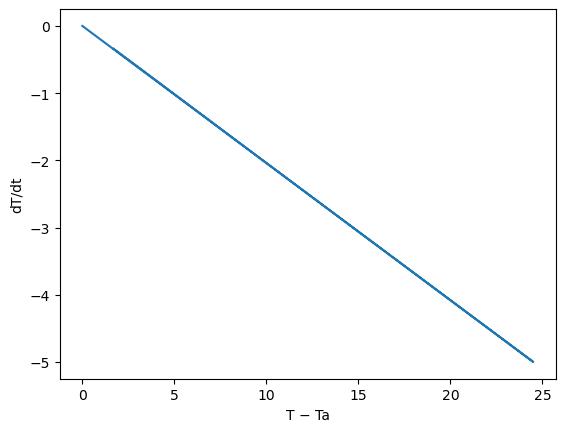

In [700]:
time=[0,5,10,15,20,25]
T=[80,44.5,30,24.1,21.7,20.7]
Ta=[20]*6
dT=[0]
TTa=[0]

for i in range(1,len(time)-1):
    dT.append( (T[i+1]-T[i-1]) / 10 )
    TTa.append(T[i]-20)

plt.plot(TTa[:],dT)
plt.xlabel("T − Ta")
plt.ylabel("dT/dt")
plt.show()

#### (b) Determine 𝑘 by applying an appropriate regression method.

In [775]:
model = linregress(TTa[:], dT)
k=model.slope
print(f'k = {model.slope}')

k = -0.20425680532075355


#### (c) Plot 𝑇 versus time (𝑡) including the measured data as discrete data points and the model fit as a continuous curve.

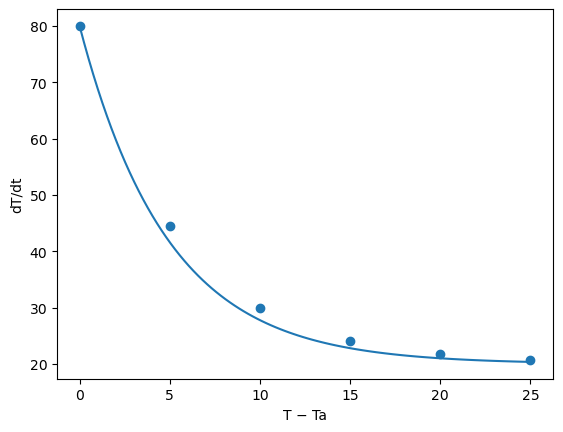

In [714]:
# T = ((dT/dt) / -k) + Ta
def pred(time):
    return (60*np.exp(k*time))+20

times=np.linspace(0,25,100)
plt.plot(times,pred(times))
plt.scatter(time,T)
plt.xlabel("T − Ta")
plt.ylabel("dT/dt")
plt.show()